# Multiple Linear Regression






In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("./../../datasets/FuelConsumption.csv")

# cargo el csv
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
X
#selecciono solo unas columnas
#co2emissions es loq eu se quiere predecir

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,2.0,4,9.9,6.7
1,2.4,4,11.2,7.7
2,1.5,4,6.0,5.8
3,3.5,6,12.7,9.1
4,3.5,6,12.1,8.7
...,...,...,...,...
1062,3.0,6,13.4,9.8
1063,3.2,6,13.2,9.5
1064,3.0,6,13.4,9.8
1065,3.2,6,12.9,9.3


In [6]:
y=df["CO2EMISSIONS"]
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

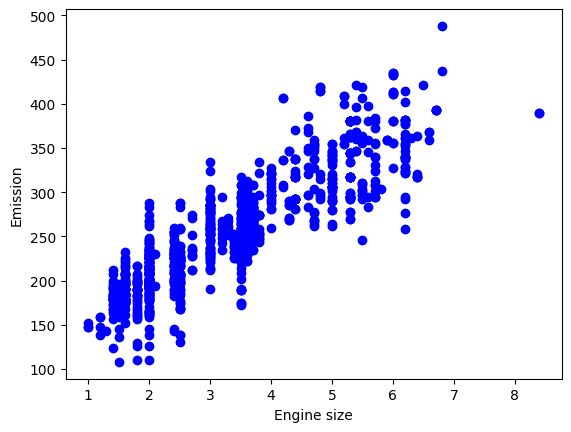

In [8]:
plt.scatter(X.ENGINESIZE, y, color='blue')#seleccionar columnas con punto
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
#creo grafico en x el tamano y en y las emisiones que es lo que se quiere predecir

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=1/3)


In [12]:
print("en train")
print(X_train.shape)
print(y_train.shape)

en train
(711, 4)
(711,)


In [13]:
print("en test")
print(X_test.shape)
print(y_test.shape)

en test
(356, 4)
(356,)


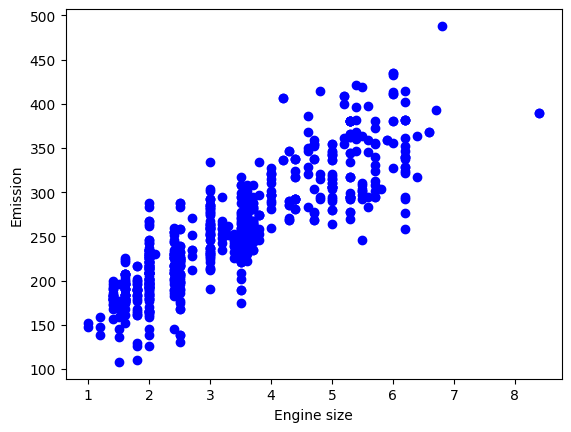

In [15]:
plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')#hace grafico con los valores de esas columnas
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()#llama la regresion



In [17]:
regr.fit (X_train, y_train)#ajusta y saca sus coeficientes

print ('Coefficients: ', regr.coef_)#por cada valor en x, cada columna, estos son los valores que se multiplican
# 2223x+22223454y+2222354z
print("Intercept:",regr.intercept_)#constante que no cambia

Coefficients:  [10.05257019  7.48443734  6.43070878  3.14879785]
Intercept: 64.03132226787508


In [18]:
y_hat= regr.predict(X_test)#hacemos prediccion 
print("predicion:")
print(y_hat)

predicion:
[199.76650264 308.0892067  216.93950374 243.84792904 315.02843973
 174.44140062 199.76650264 349.32397256 213.53262564 313.69117349
 212.28641781 329.29866794 187.68864146 202.05052899 202.28554092
 299.86087852 248.37010893 257.14689528 315.02843973 203.09420009
 256.7640254  198.82628232 205.21263815 261.82135215 269.50859459
 285.97650568 183.78290984 197.22084174 184.43039975 304.65063184
 234.90853989 340.56491655 321.42363363 306.63750874 196.91038099
 326.94960489 189.66957949 285.0303144  198.1654811  185.27600736
 352.56004277 271.38754747 312.48719787 191.68304692 344.53421924
 203.62492791 256.78470914 273.69225756 263.81855488 218.00749917
 197.45442013 210.78144253 190.39395177 214.36492194 324.13783621
 217.54034241 263.35581715 178.47275452 258.99480651 313.50871959
 394.30219522 254.3647026  388.79064083 295.45698057 185.71654151
 320.92248181 250.06278979 190.51960613 212.28641781 361.41813052
 254.74757248 210.35720517 259.3096863  194.73427867 238.89557292

In [19]:
print(regr.score(X_test,y_test))

0.86382091283594


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred = y_hat)
mse

544.8892888762318